## Introduction

Data can be derived from numerous trends, results, or even hypotheses. This data is then used to calculate or lead to conclusions based on a certain circumstance. However, the goal of this report is to analyze the frequency of the first and last digits between 1-9 that appear within various columns of given data, and examine the results based on the correlation, or lack of, in relation to the data that the given numbers have come from. The digits that will be analyzed for this report will not be used to observe results for a certain circumstance, but will focus on the results for the data found in certain columns of the circumstance. 

The results that will be concluded from this data can be associated with a defintion known as *Benford's Law*, which is defined as "the principle that in any large, randomly produced set of natural numbers, such as tables of logarithms or corporate sales statistics, around 30 percent will begin with the digit 1, 18 percent with 2, and so on, with the smallest percentage beginning with 9. The law is applied in analyzing the validity of statistics and financial records" ([Benford's Law](https://www.lexico.com/en/definition/benford's_law)). This law has been used to identify various trends as shown in bar graphs based on numbers ranging from 1-9. 

This report will focus on the relevance of *Benford's Law* in relation to the given data sources by analyzing the first and last digits following the range.

### Helper functions:

This part introduces the definitions that will be essential to the report, including the functions that derive the first digit, `fd`, and the last digit, `ld`, in any given data set or column. 

In [1]:
def fd(x): #Defines the first digit in a column of data
    a=str(x) #Converts the data into a string
    for i in a:
        if i in '123456789':
            return i #Returns the first nonzero digit in the data
    return '0'

In [2]:
fd(127.47) #checking to see if the first digit function works with decimals

'1'

In [3]:
fd(0.098) #checking to see if the first digit function works with zeros and decimals

'9'

In [4]:
def ld(x): #Defines the last digit in a column of data
    a=str(x) #Converts the data into a string
    for i in a[::-1]:
        if i in '123456789':
            return i  
    return '0'

In [5]:
ld(1234) #checking to see if the last digit function works successfully with integers

'4'

In [6]:
ld(187.2930) #checking to see if the last digit function works successfully with decimals and zeros

'3'

Now that the essential functions, `fd` and `ld`, have been defined, they can be applied to the given data files.

## Part 1

This part of the report will include the addition of functions that will also be used throughout this part as data from various sources are imported. The functions, `apply_fd`,`apply_ld`,`countfd`,`countld`, and `plotdigits`, will be used and applied to each source as it will adapt for any of the sources given. Once these functions have been successfuly computed in relation to the specific source, then the first and last digits of the data can be analyzed for any patterns that may or may not appear. 

In [7]:
#Necessary imports used throughout the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def apply_fd(file, column): #Defines the application of the first digit
    return file[column].apply(fd) 

This definition takes any file and any numerical column within that file and applies the first digit function defined previously.

In [9]:
def apply_ld(file, column): #Defines the application of the last digit
    return file[column].apply(ld)

This definition takes any file and any numerical column within that file and applies the last digit function defined previously.

In [10]:
def countfd(n,k):
    return apply_fd(n,k).value_counts()

This definition takes the first digits found within a column of any given data source and applies the `value_counts()` function that will count the amount of times that first digit appears in the column.

In [11]:
def countld(n,k):
    return apply_ld(n,k).value_counts()

This definition takes the last digits found within a column of any given data source and applies the `value_counts()` function that will count the amount of times that last digit appears in the column.

In [12]:
def plotdigits(n,k): #Defines the plot that will be generated to show the first and last digits within the column.
    #application of the first and last digit counts derived from the source that will be applied to the graph.
    x=countfd(n,k) 
    y=countld(n,k) 
    plt.figure(figsize=(15,10))
    plt.subplots_adjust (wspace=0.5,hspace=0.5)
    
    plt.subplot(2,2,1)
    if x.index[-1]=='0':
        plt.bar(x.index[:-1],x.values[:-1])
        plt.xlabel('Number', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
    else:
        plt.bar(x.index[:],x.values[:])
        plt.title('First Digit Frequency in '+ k, fontsize=15)
        plt.xlabel('Number', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
    
    plt.subplot(2,2,2)
    if y.index[-1]=='0':
        plt.bar(y.index[:-1],y.values[:-1])
        plt.xlabel('Number', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
    else:
        plt.bar(y.index[:],y.values[:])
        plt.title('Last Digit Frequency in '+ k, fontsize=15)
        plt.xlabel('Number', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)

    plt.suptitle('Digit Frequency Within Data', fontsize=20)
    plt.show()

This defintion will plot the count of first and last digits appearing in a source as bar graphs on a subplot. 

### New York Stock Exchange

This includes the analysis of the first and last digits of the `52 Wk High`, `52 Wk Low`, and `Volume` columns within the data derived from the New York Stock Exchange.

In [13]:
#Uploading the necessary data file to be used
nyse=pd.read_csv('NYSE_2016_03_25.csv' #file name
                ,delimiter=',' #character separating columns
                ,skiprows=3 #how many rows need to be skipped to give relevant data
                ,header=0
                ,encoding='latin1'
                ,low_memory=False)
display(nyse[:10])

,Name,Symbol,Open,High,Low,Close,Net Chg,% Chg,Volume,52 Wk High,52 Wk Low,YTD % Chg
0,3D Systems,DDD,14.14,14.81,13.60,14.76,0.32,2.22,3240444,32.88,6.00,69.85
1,3M,MMM,163.68,164.54,163.05,164.46,0.19,0.12,1730167,167.70,134.00,9.17
2,58.com ADR,WUBA,56.25,56.76,55.28,56.48,-0.04,-0.07,518280,83.71,37.72,-14.37
3,500.com ADR,WBAI,16.46,17.18,16.04,16.88,0.26,1.56,378620,30.67,9.89,-16.02
4,A10 Networks,ATEN,5.85,5.91,5.77,5.87,-0.03,-0.51,126272,8.30,4.12,-10.52
5,AAC Holdings,AAC,18.18,18.48,17.99,18.38,0.17,0.93,123794,46.60,14.36,-3.57
6,AAR Corp.,AIR,22.82,22.83,21.45,22.80,-0.23,-1.00,463662,34.24,18.36,-13.28
7,Aaron's Inc.,AAN,23.76,23.88,23.37,23.87,-0.14,-0.58,240738,40.80,20.24,6.61
8,ABB ADR,ABB,18.80,18.94,18.78,18.93,-0.16,-0.84,1308716,23.66,15.74,6.77
9,Abbott Laboratories,ABT,40.64,40.90,40.36,40.75,-0.03,-0.07,4038030,51.74,36.00,-9.26


This is the file that contains the data that will be used for this part of the report.

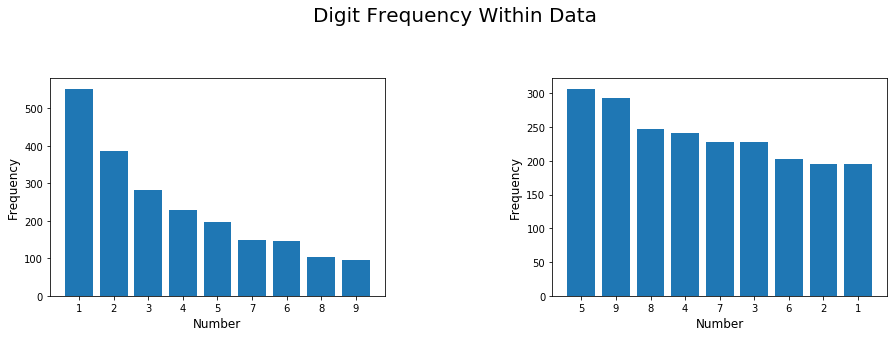

In [14]:
plotdigits(nyse,'52 Wk High') #application of the function derived previously in relation to the NYSE data source.

This subplot depicts the frequency of the first and last digits found in the 52 Week High column of the data, with the most common first digit being 1 and the least common first digit being 9, and with the most common last digit being 5 and the least common last digit being 2.

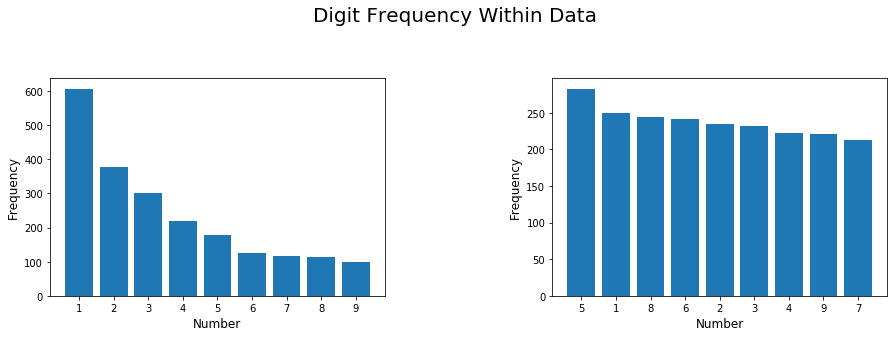

In [15]:
plotdigits(nyse,'52 Wk Low') #application of the function derived previously in relation to the NYSE data source.

This subplot depicts the frequency of the first and last digits found in the 52 Week Low column of the data, with the most common first digit being 1 and the least common first digit being 9, and with the most common last digit being 5 and the least common last digit being 7.

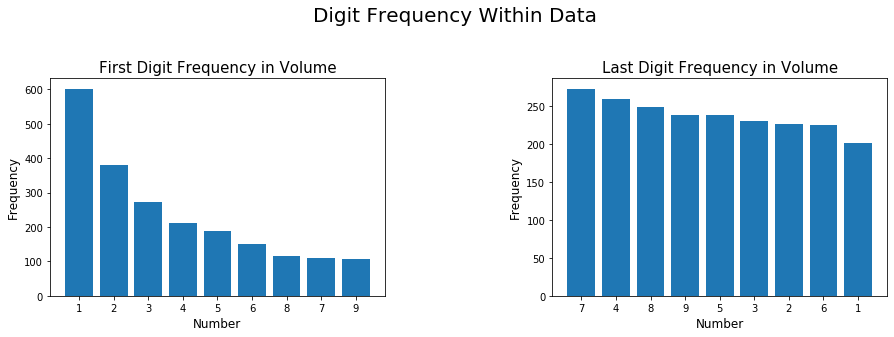

In [16]:
plotdigits(nyse,'Volume') #application of the function derived previously in relation to the NYSE data source.

This subplot depicts the frequency of the first and last digits found in the Volume column of the data, with the most common first digit being 1 and the least common first digit being 9, and with the most common last digit being 7 and the least common last digit being 1.

For the analysis of the New York Stock Exchange, it seems as though the most common first digit to be found throughout all three graphs was 1, and the least common digit found throughout the graphs was 9. This is consistent with *Benford's Law* in that the leading significant digit is small, and in this case it is 1, while 9 is the leading digit with the least amount of significance. The last digits derived from the data, however, do not seem to correlate in any way, since the numbers 5 and 7 seem to be the most common digits found.

### Capital Distances

This includes the analysis of the first and last digits of the `distance` column within the data derived from the distances between two countries in the world.

In [17]:
#Uploading the necessary data file to be used
distances=pd.read_csv('capital_distances.txt' #uploading the text file
                  ,delimiter=' ' #character separating columns
                  ,skiprows=12 #how many rows need to be skipped to give relevant data
                  ,header=None
                  ,names=['c1','c2','distance','country 1','country 2'] #adds a title 
                  ,encoding='latin1'
                  ,low_memory=False)
display(distances[:10])

,c1,c2,distance,country 1,country 2
0,1,2,6405.558,USA,Germany
1,1,3,10910.268,USA,Japan
2,1,4,5904.034,USA,United.Kingdom
3,1,5,6168.601,USA,France
4,1,6,7222.464,USA,Italy
5,1,7,733.894,USA,Canada
6,1,8,11154.311,USA,China
7,1,9,6197.566,USA,Netherlands
8,1,10,13128.552,USA,Hong.Kong
9,1,11,6221.288,USA,Belgium-Lux


This is the file that contains the data that will be used for this part of the report.

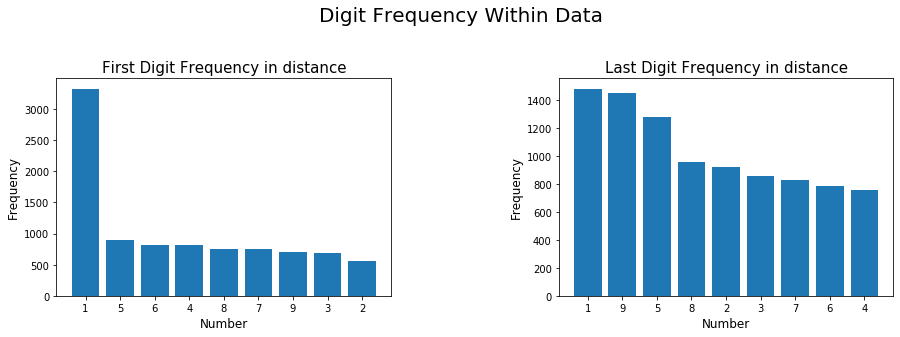

In [18]:
plotdigits(distances,'distance') #application of the function derived previously in relation to the capital distances data source.

This subplot depicts the frequency of the first and last digits found in the `Distance` column of the data, with the most common first digit being 1 and the least common first digit being 2, and with the most common last digit being 1 and the least common last digit being 4.

For the analysis of the distances between various countries *Benford's Law* seems to remain to be consistent with the data, showing that the small number 1 is the leading most significant digit found in the data consisting of both the first and last digits. However, larger numbers seem to be runner-up for most significant first or last digit in the data.

### Country Populations

This includes the analysis of the first and last digits of the `1960`,`1980`, and `2000` columns within the data derived from the populations of different countries throughout various years.

In [19]:
#Uploading the necessary data file to be used
populations=pd.read_csv('country_populations.csv' #uploading the file for the country populations
                  ,delimiter=','#character separating columns
                  ,header=0
                  ,encoding='latin1'
                  ,low_memory=False)
display(populations[:10])

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,AFG,8994793.0,9164945.0,9343772.0,9531555.0,9728645.0,9935358.0,10148841.0,10368600.0,...,24399948,25183615,25877544,26528741,27207291,27962207,28809167,29726803,30682500,31627506
1,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,3011487,2992547,2970017,2947314,2927519,2913021,2904780,2900489,2897366,2894475
2,Algeria,DZA,11124892.0,11404859.0,11690152.0,11985130.0,12295973.0,12626953.0,12980269.0,13354197.0,...,33267887,33749328,34261971,34811059,35401790,36036159,36717132,37439427,38186135,38934334
3,American Samoa,ASM,20012.0,20478.0,21118.0,21883.0,22701.0,23518.0,24320.0,25116.0,...,59117,58648,57904,57031,56226,55636,55316,55227,55302,55434
4,Andorra,AND,13414.0,14376.0,15376.0,16410.0,17470.0,18551.0,19646.0,20755.0,...,81223,83373,84878,85616,85474,84419,82326,79316,75902,72786
5,Angola,AGO,5270844.0,5367287.0,5465905.0,5565808.0,5665701.0,5765025.0,5863568.0,5962831.0,...,17912942,18541467,19183907,19842251,20520103,21219954,21942296,22685632,23448202,24227524
6,Antigua and Barbuda,ATG,54681.0,55403.0,56311.0,57368.0,58500.0,59653.0,60818.0,62002.0,...,82565,83467,84397,85350,86300,87233,88152,89069,89985,90900
7,Argentina,ARG,20619075.0,20953079.0,21287682.0,21621845.0,21953926.0,22283389.0,22608747.0,22932201.0,...,39145491,39558750,39969903,40381860,40798641,41222875,41655616,42095224,42538304,42980026
8,Armenia,ARM,1867396.0,1934239.0,2002170.0,2070427.0,2138133.0,2204650.0,2269475.0,2332624.0,...,3014917,3002161,2988117,2975029,2966108,2963496,2967984,2978339,2992192,3006154
9,Aruba,ABW,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,57712.0,58049.0,...,100031,100830,101218,101342,101416,101597,101936,102393,102921,103441


This is the file that contains the data that will be used for this part of the report.

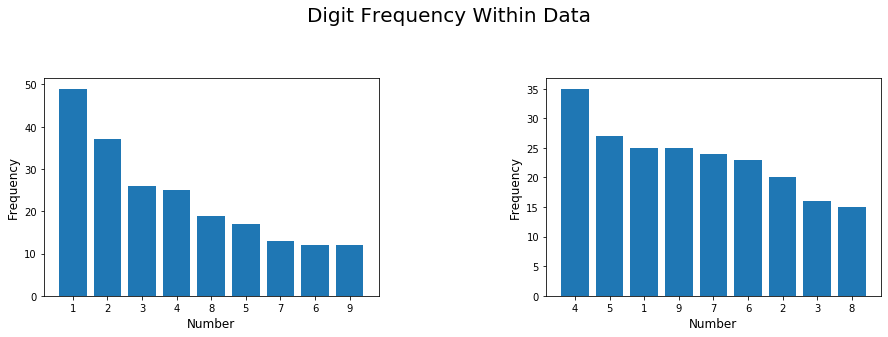

In [20]:
plotdigits(populations,'1960') #application of the function derived previously in relation to the country pop. data source.

This subplot depicts the frequency of the first and last digits found in the year 1960 column of the data, with the most common first digit being 1 and the least common first digit being 6, and with the most common last digit being 4 and the least common last digit being 8.

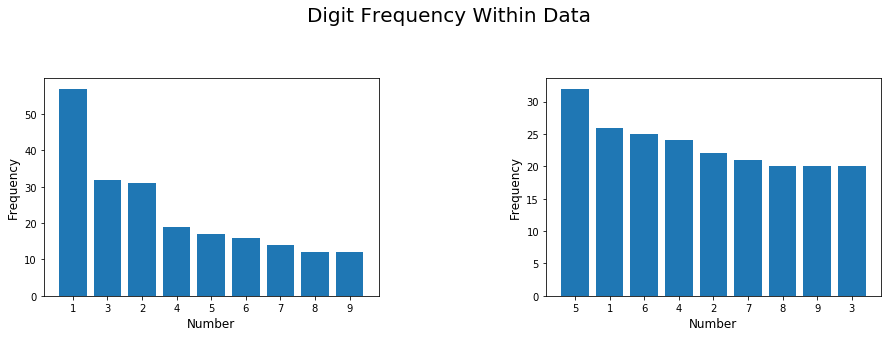

In [21]:
plotdigits(populations,'1980') #application of the function derived previously in relation to the country pop. data source.

This subplot depicts the frequency of the first and last digits found in the year 1980 column of the data, with the most common first digit being 1 and the least common first digit being 8, and with the most common last digit being 5 and the least common last digit being 3.

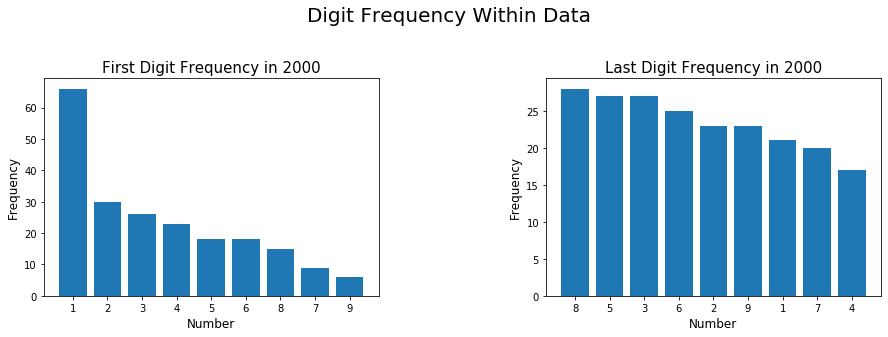

In [22]:
plotdigits(populations,'2000') #application of the function derived previously in relation to the country pop. data source.

This subplot depicts the frequency of the first and last digits found in the year 2000 column of the data, with the most common first digit being 1 and the least common first digit being 9, and with the most common last digit being 8 and the least common last digit being 4.

For the analysis of the populations found within the countries worldwide throughout the three chosen years, it seems as though the most common first digit to be found throughout all three graphs was 1, and the least common digit found throughout the graphs was 9. This is consistent with *Benford's Law* in that the leading significant digit is small, and in this case it is 1, while 9 is the leading digit with the least amount of significance. Larger numbers continue to be less significant within the data. The last digits derived from the data, however, do not seem to correlate in any way, since the numbers 8,5, and 4 seem to be the most common last digits found.

### Country Areas

This includes the analysis of the first and last digits of the `area (sq km)`, and `area (sq miles)` columns within the data derived from the areas of various countries.

In [23]:
#Uploading the necessary data file to be used
areas=pd.read_csv('country_areas.csv'
                  ,delimiter=','
                  ,header=0
                  ,skiprows=1
                  ,names=['code','area (sq km)','area (sq miles)']
                  ,encoding='latin1'
                  ,low_memory=False)
display(areas[:10])

,code,area (sq km),area (sq miles)
Country Name,Country Code,Area (sq km),Area (sq miles)
Afghanistan,AFG,652860,252071
Albania,ALB,28750,11100
Algeria,DZA,2381740,919595
American Samoa,ASM,200,77
Andorra,AND,470,182
Angola,AGO,1246700,481353
Antigua and Barbuda,ATG,440,170
Argentina,ARG,2780400,1073518
Armenia,ARM,29740,11483


This is the file that contains the data that will be used for this part of the report.

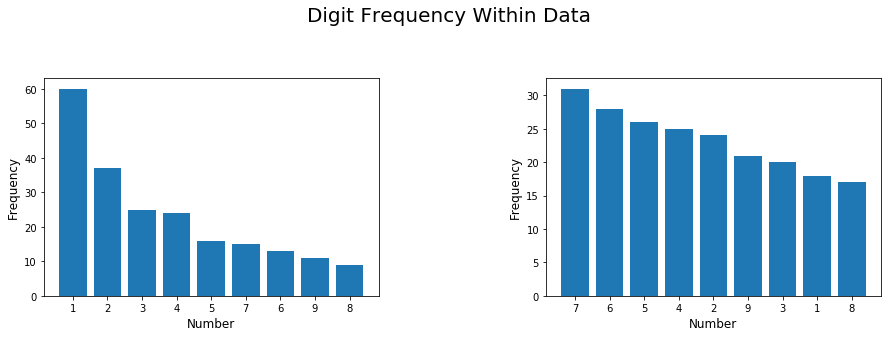

In [24]:
plotdigits(areas,'area (sq km)') #application of the function derived previously in relation to the country areas data source.

This subplot depicts the frequency of the first and last digits found in the area in sq. km. column of the data, with the most common first digit being 1 and the least common first digit being 8, and with the most common last digit being 8 and the least common last digit being 4.

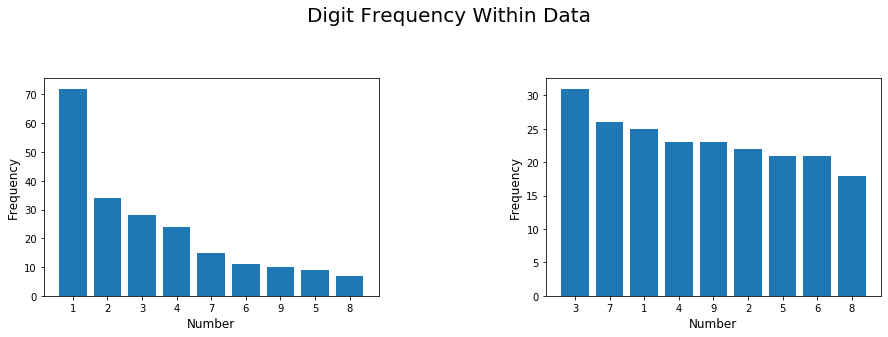

In [25]:
plotdigits(areas,'area (sq miles)') #application of the function derived previously in relation to the country areas data source.

This subplot depicts the frequency of the first and last digits found in the area in sq. km. column of the data, with the most common first digit being 1 and the least common first digit being 8, and with the most common last digit being 3 and the least common last digit being 8.

For the analysis of the areas of various countries in sq. km and sq. miles, it seems as though the most common first digit to be found throughout the graphs was 1, and the least common digit found throughout the graphs was 8. This is consistent with *Benford's Law* in that the leading significant digit is small, and in this case it is 1, while 8 is the leading digit with the least amount of significance. Larger numbers continue to be less significant within the data, although it is odd that the largest number, 9, is not the least significant digit. The last digits derived from the data, however, do not seem to correlate in any way, since the numbers 3 and 7 seem to be the most common last digits found.

## Part 2

This part includes applying the  functions derived above into the given file containing text of all articles published by New York Times on June 1, 2010. The function `countnumber` will be used with to count the amount of times a digit appears in the text.

In [26]:
import re

In [27]:
#opening the text file to be used throughout this part of the report
f=open('NYT_2010_06_01.txt','r')
NYT=f.read()
f.close()

In [28]:
#assigning a variable
number=re.findall(r'[\d.,]+', NYT)
number=[k for k in number if k!='.']
number=[k for k in number if k!=',']
number=[k for k in number if k!='.,']

In [29]:
firstdigitslist=[]
for k in number:
    firstdigitslist.append(fd(k))    

This creates a list that will contain the first digits that are found throughout the text.

In [30]:
lastdigitslist=[]
for k in number:
    lastdigitslist.append(ld(k))

This creates a list that will contain the last digits that are found throughout the text.

In [31]:
def countnumber(x):
    countdict={}
    for i in x:
        if i in countdict:
            countdict[i]+=1
        else: 
            countdict[i]=1
    return countdict

This definition counts the amount of times a certain digit appears in the text.

In [32]:
a=countnumber(firstdigitslist) #assigning a variable to represent the list containing the first digits in the text

In [33]:
b=countnumber(lastdigitslist) #assigning a variable to represent the list containing the last digits in the text

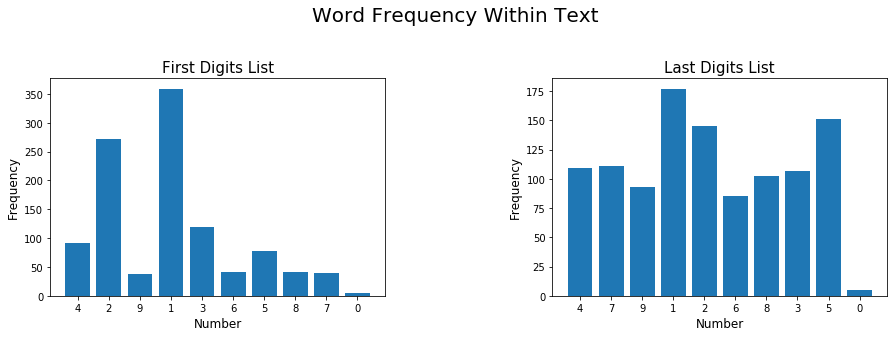

In [34]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.subplot(2,2,1)
plt.bar(a.keys(),a.values())
plt.title('First Digits List', fontsize=15)
plt.xlabel('Number', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(2,2,2)
plt.bar(b.keys(),b.values())
plt.title('Last Digits List', fontsize=15)
plt.xlabel('Number', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.suptitle('Word Frequency Within Text', fontsize=20)
plt.show()

These graphs do not seem to be consistent with *Benford's Law* in that the data seems to be random, this still remains consistent with the law in that it must relate with numerical data, whereas this part analyzes the digits found on a text.

## Conclusion

The first digits of the columns of the data set seem to be numbers less than 5, whereas the last digits that appear in a given data set seem to be uncorrelated. Benford's Law remains consistent with the data found in various sources that seem to be based on numerical data, however does not seem to be consistent with data found in a random text article.

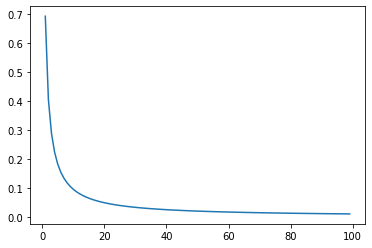

In [35]:
xlist=[i for i in range(1,100)]
ylist=[]
for j in xlist:
    y = np.log(1+(1/j))
    ylist.append(y)
plt.plot(xlist,ylist)
plt.show()

This graph represents Benford's Law as a log function, which seems to be the shape of the first digits graphs in all of the sources from above except for the capital distances, which is due to insufficient data.